# Chapter 4.2. Transformations of Lexical Data and Linguistic Annotation

In [1]:
import sys
import os
import glob
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
sys.path.append(os.path.abspath("../../"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, text2features, st_tests, process_labels
import pandas as pd
import re
import numpy as np
from shutil import copyfile

# 4.2.0. Getting Data

In [ ]:
copyfile("../../novelasespanolas/chapters_txt_all_freq_table_raw__T.pqt", "../../ne_data/chapters_txt_all_freq_table_raw__T.pqt")

In [2]:
outdir = "../../ne_data/chap_4_2/"

In [3]:
metadata = load_data.load_metadata(wdir ="../../ne_data/", metadata_table = "metadata_beta-opt-obl-structure.csv", sep = ",").fillna("")
metadata.shape

metadata and class shape: 	 (358, 174)


(358, 174)

In [4]:
metadata.head()

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,am.wnlex.noun.Topss,am.wnlex.noun.relations,am.wnlex.noun.attributes,am.wnlex.verb.emotions,am.wnlex.noun.locations,am.wnlex.noun.events,am.wnlex.verb.contacts,am.wnlex.xxxs,am.wnlex.verb.changes,decade
ne0001,ne0001,Baroja,Mayorazgo,1903,narrative,novela,realist,Spain,3.69129e+07,XX842743,...,121,13,483,200,312,177,518,41371,655,1900
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,239,39,821,314,336,355,684,70169,764,1880
ne0003,ne0003,Galdos,Nazarin,1895,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,253,17,725,396,301,327,498,54401,572,1890
ne0004,ne0004,Galdos,Halma,1895,narrative,novela,realist,Spain,7.1396e+07,XX1014802,...,288,24,1061,424,282,248,450,60648,553,1890
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,7.1396e+07,XX1014802,...,191,17,705,456,174,229,415,43359,446,1890


In [5]:
metadata.loc[metadata["title"].isin(["Pazos","TiranoBanderas"])]

,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,am.wnlex.noun.Topss,am.wnlex.noun.relations,am.wnlex.noun.attributes,am.wnlex.verb.emotions,am.wnlex.noun.locations,am.wnlex.noun.events,am.wnlex.verb.contacts,am.wnlex.xxxs,am.wnlex.verb.changes,decade
ne0030,ne0030,Valle,TiranoBanderas,1926,narrative,novela,historical,Spain,6.89368e+07,XX1055436,...,84,19,422,193,217,244,629,42050,468,1920
ne0077,ne0077,Bazan,Pazos,1886,narrative,novela,realist,Spain,5.16996e+07,XX1104029,...,263,19,937,341,380,445,907,68045,921,1880


In [6]:
pd.__version__

'0.23.4'

In [7]:
corpus = pd.read_parquet("../../ne_data/freq_table_raw__T.pqt").T

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [8]:
corpus.shape

(358, 251592)

In [9]:
corpus.head()

,",",.,de,la,y,que,el,en,a,los,...,garantizándoles,garantizándola,garantizáis,garantizasen,garantizará,garantizarlo,garantizarles,garantizara,garantirse,habiliá
ne0001,3609,2908,2798,2098,2032,1414,1721,1277,1282,818,...,0,0,0,0,0,0,0,0,0,0
ne0002,8007,7252,4278,3091,3164,3256,1639,1873,1934,895,...,0,0,0,0,0,0,0,0,0,0
ne0003,6518,4879,3045,2198,2667,2771,1540,1392,1481,711,...,0,0,0,0,0,0,0,0,0,0
ne0004,7428,5723,3693,2563,2646,2780,1580,1619,1643,756,...,0,0,0,0,0,0,0,0,0,0
ne0005,4839,4693,2683,1617,1895,2027,989,1063,1025,518,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(corpus.columns.tolist()[0:15])

[',', '.', 'de', 'la', 'y', 'que', 'el', 'en', 'a', 'los', 'no', 'se', '—', 'con', 'un']


In [11]:
corpus.index = metadata["title"]

In [12]:
corpus_relative = text2features.calculate_relative_frequencies(corpus)

In [13]:
corpus_chapters_df = pd.read_parquet("../../ne_data/chapters_txt_all_freq_table_raw__T.pqt")
corpus_chapters_df = corpus_chapters_df.T
corpus_chapters_df.shape

(10782, 10000)

In [14]:
corpus.loc["Pazos"].sum()

102686

In [15]:
corpus.loc["Pazos"].mode()

0    0
dtype: int64

In [16]:
from scipy import stats

In [17]:
stats.skew(corpus.loc["Pazos"])

191.9004345742397

In [18]:
results_sample_df = text2features.describe_transformation(corpus, ["raw","relative","zscores","rel-zscores","tfidf","log","rel-log","log-zscores","rel-log-zscores","rel-log10-zscores","rel-log10","binary", "log2","log10","rel-log1000","log10zscores", "rel-lang-zscore","rel-tfidf","rel-log10-tfidf","rel-log10-zscores-tfidf","rel-log10-tfidf-zscores","rel-tfidf-zscores","rel-zscores-tfidf","rel-tfidf-log10-zscores","rel-tfidf-log10"], make_relative=False)#,"","log10","minmax","log10zscores","zscoreslog"])

(358, 2000)
raw
textual representation:  raw
Columns that are empty:  []
relative
textual representation:  relative
Columns that are empty:  []
zscores
textual representation:  zscores
Columns that are empty:  []
rel-zscores
textual representation:  rel-zscores
Columns that are empty:  []
tfidf
textual representation:  tfidf
Columns that are empty:  []
log


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
rel-log
textual representation:  rel-log
Columns that are empty:  []
log-zscores
textual representation:  log-zscores
Columns that are empty:  []
rel-log-zscores
textual representation:  rel-log-zscores
Columns that are empty:  []
rel-log10-zscores


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:174: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  rel-log10-zscores
Columns that are empty:  []
rel-log10
textual representation:  rel-log10
Columns that are empty:  []
binary
textual representation:  binary
Columns that are empty:  []
log2


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:168: RuntimeWarning: divide by zero encountered in log2
  corpus = np.log2(corpus)


textual representation:  log2
Columns that are empty:  []
log10
textual representation:  log10
Columns that are empty:  []
rel-log1000
textual representation:  rel-log1000
Columns that are empty:  []
log10zscores
textual representation:  log10zscores
Columns that are empty:  []
rel-lang-zscore
textual representation:  rel-lang-zscore
Columns that are empty:  []
rel-tfidf
textual representation:  rel-tfidf
Columns that are empty:  []
rel-log10-tfidf
textual representation:  rel-log10-tfidf
Columns that are empty:  []
rel-log10-zscores-tfidf
textual representation:  rel-log10-zscores-tfidf
Columns that are empty:  []
rel-log10-tfidf-zscores
textual representation:  rel-log10-tfidf-zscores
Columns that are empty:  ['mi', 'él', 'muy', 'ni', 'estaba', 'ojos', 'poco', 'nos', 'he', 'esto', 'así', 'gran', 'tiene', 'les', 'allí', 'cómo', 'menos', 'luego', 'cosas', 'hombres', 'otros', 'hacia', 'puede', 'decir', 'hecho', 'alma', 'luz', 'casi', 'va', 'mientras', 'tierra', 'mañana', 'medio', 'sabe'

In [19]:
results_sample_df

,min,max,mean,std,median,IQR,Pearson's R,R p-value,Gaussian Test,Gaussian p-value,skew
transformation,,,,,,,,,,,
raw,0.000000,7403.000000,39.212500,288.910491,7.000000,11.000000,1.000000,0.000000e+00,4151.122770,0.000000e+00,17.230192
relative,0.000000,0.094396,0.000500,0.003684,0.000089,0.000140,1.000000,0.000000e+00,4151.122770,0.000000e+00,17.230192
zscores,-1.006320,7.894330,0.228450,0.743293,0.070963,0.829397,0.077459,5.260734e-04,1105.869091,7.304289e-241,2.313855
rel-zscores,-1.334026,6.404743,-0.016593,0.652386,-0.147358,0.705040,0.076669,5.999638e-04,1021.858282,1.277302e-222,2.141755
tfidf,-20.649944,89.760331,1.185041,3.518208,0.715812,1.041117,-0.227305,7.493016e-25,3803.857227,0.000000e+00,14.146985
log,0.000000,8.909641,1.943745,1.359370,1.945910,1.540445,0.430580,4.473665e-91,331.820295,8.833615e-73,0.956717
rel-log,-12.390800,-2.360257,-9.405176,1.495867,-9.323988,1.540445,0.398463,4.348977e-77,134.665804,5.723903e-30,0.424749
log-zscores,-1.857956,3.698068,0.430599,0.756018,0.510102,1.007981,0.064611,3.843876e-03,2.927110,2.314122e-01,-0.051868
rel-log-zscores,-2.265015,3.517787,0.197613,0.663549,0.273599,0.842330,0.049401,2.715714e-02,61.214025,5.099685e-14,-0.323647


In [20]:
results_sample_df.to_csv(outdir+"results_sample.csv",sep="\t")

# 4.2.2. Classic Transformation of Frequency of Features

## 4.2.2.1. Term Frequency (Raw)

In [24]:
text_name1 = "Pazos"
text_name2 = "TiranoBanderas"

In [25]:
corpus.loc[[text_name1,text_name2]].plot.scatter

<bound method FramePlotMethods.scatter of <pandas.plotting._core.FramePlotMethods object at 0x7f8cd2a67908>>

In [26]:
pd.concat([corpus.loc[[text_name1,text_name2]],corpus.loc[[text_name1,text_name2]]])

,",",.,de,la,y,que,el,en,a,los,...,garantizándoles,garantizándola,garantizáis,garantizasen,garantizará,garantizarlo,garantizarles,garantizara,garantirse,habiliá
title,,,,,,,,,,,,,,,,,,,,,
Pazos,7403,5973,4710,3371,2907,2473,2571,1939,2199,1120,...,0,0,0,0,0,0,0,0,0,0
TiranoBanderas,3937,2784,2517,2195,1424,818,2051,1145,682,804,...,0,0,0,0,0,0,0,0,0,0
Pazos,7403,5973,4710,3371,2907,2473,2571,1939,2199,1120,...,0,0,0,0,0,0,0,0,0,0
TiranoBanderas,3937,2784,2517,2195,1424,818,2051,1145,682,804,...,0,0,0,0,0,0,0,0,0,0


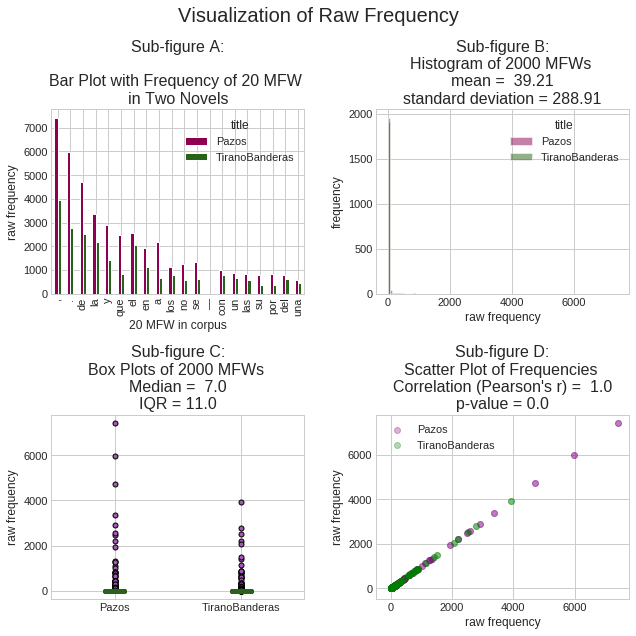

In [27]:
describe_data.visualize_transformation(outdir, corpus, "raw", corpus, "raw", results_sample_df)

## 4.2.2.2. Term-Document Frequency (Relative)

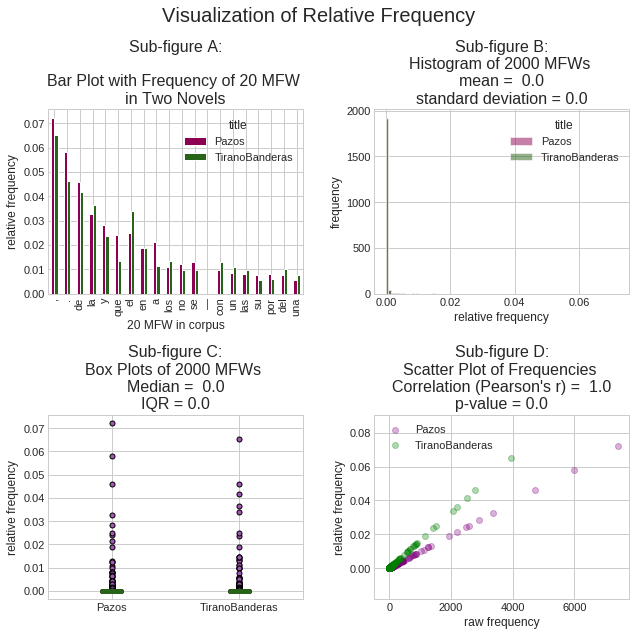

In [28]:
describe_data.visualize_transformation(outdir, corpus_relative, "relative", corpus, "raw", results_sample_df)

## 4.2.2.3. Logarithmic Term Frequency

In [29]:
corpus_log = text2features.choose_features(corpus,"log")

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []


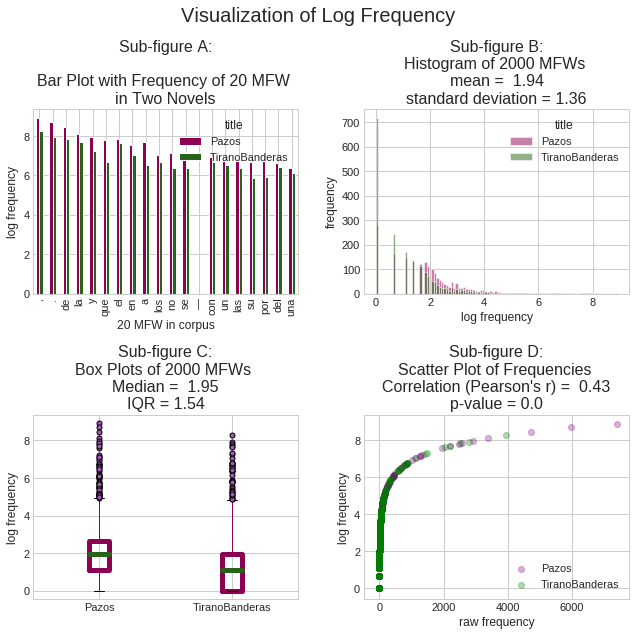

In [30]:
describe_data.visualize_transformation(outdir, corpus_log, "log", corpus, "raw", results_sample_df)

In [31]:
corpus_log.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).head()

title,Pazos
",",8.909641
.,8.695005
de,8.457443
la,8.122965
y,7.974877


In [32]:
st_tests.test_normality(corpus_log.loc["Pazos"])

,statistic,p-value,result
Pazos,418184,0,distribution is not normal


In [33]:
corpus_log.head()

,",",.,de,la,y,que,el,en,a,los,...,garantizándoles,garantizándola,garantizáis,garantizasen,garantizará,garantizarlo,garantizarles,garantizara,garantirse,habiliá
title,,,,,,,,,,,,,,,,,,,,,
Mayorazgo,8.191186,7.975221,7.936660,7.648740,7.616776,7.254178,7.450661,7.152269,7.156177,6.706862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Misericordia,8.988071,8.889033,8.361241,8.036250,8.059592,8.088255,7.401842,7.535297,7.567346,6.796824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nazarin,8.782323,8.492696,8.021256,7.695303,7.888710,7.926964,7.339538,7.238497,7.300473,6.566672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Halma,8.913012,8.652248,8.214194,7.848934,7.880804,7.930206,7.365180,7.389564,7.404279,6.628041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tristana,8.484463,8.453827,7.894691,7.388328,7.546974,7.614312,6.896694,6.968850,6.932448,6.249975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
corpus_rel_log = text2features.choose_features(corpus,"rel-log")

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  rel-log
Columns that are empty:  []


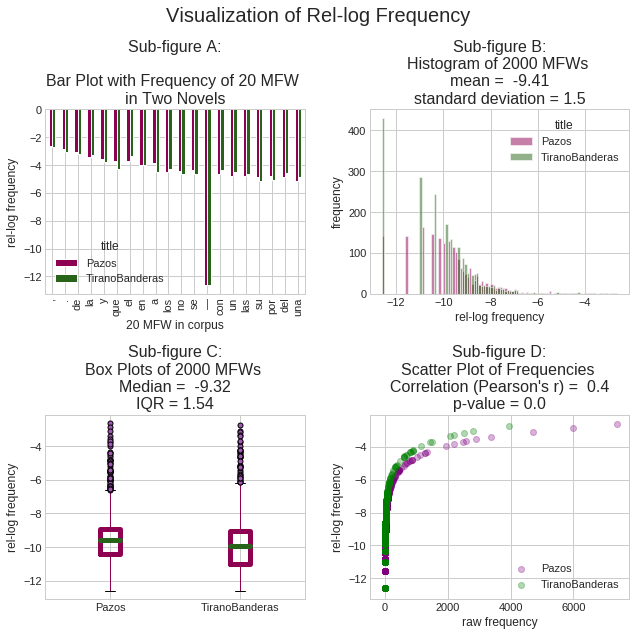

In [35]:
describe_data.visualize_transformation(outdir, corpus_rel_log, "rel-log", corpus, "raw", results_sample_df)


In [36]:
corpus_rel_log.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).head()

title,Pazos
",",-2.629790
.,-2.844426
de,-3.081988
la,-3.416466
y,-3.564554


In [37]:
corpus_rel_log.loc[["Pazos"]].T.iloc[3000:3005]

title,Pazos
suficiente,-10.153137
gallo,-10.846284
marta,-12.611258
temo,-11.539431
sentados,-12.611258


In [38]:
corpus_rel_log.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).tail()

title,Pazos
mangui,-12.611258
indignábanse,-12.611258
enredarle,-12.611258
berande,-12.611258
habiliá,-12.611258


In [39]:
corpus_rel_log.head()

,",",.,de,la,y,que,el,en,a,los,...,garantizándoles,garantizándola,garantizáis,garantizasen,garantizará,garantizarlo,garantizarles,garantizara,garantirse,habiliá
title,,,,,,,,,,,,,,,,,,,,,
Mayorazgo,-2.871852,-3.087817,-3.126378,-3.414298,-3.446262,-3.808860,-3.612377,-3.910769,-3.906862,-4.356176,...,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258
Misericordia,-2.563844,-2.662883,-3.190674,-3.515665,-3.492323,-3.463661,-4.150074,-4.016619,-3.984570,-4.755092,...,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258
Nazarin,-2.507096,-2.796724,-3.268163,-3.594116,-3.400710,-3.362456,-3.949882,-4.050923,-3.988947,-4.722747,...,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258
Halma,-2.502687,-2.763450,-3.201504,-3.566765,-3.534894,-3.485492,-4.050518,-4.026134,-4.011419,-4.787657,...,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258
Tristana,-2.595631,-2.626267,-3.185403,-3.691766,-3.533120,-3.465782,-4.183400,-4.111244,-4.147646,-4.830119,...,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258,-12.611258


In [40]:
corpus_log10 = text2features.choose_features(corpus,"log10")

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:174: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  log10
Columns that are empty:  []


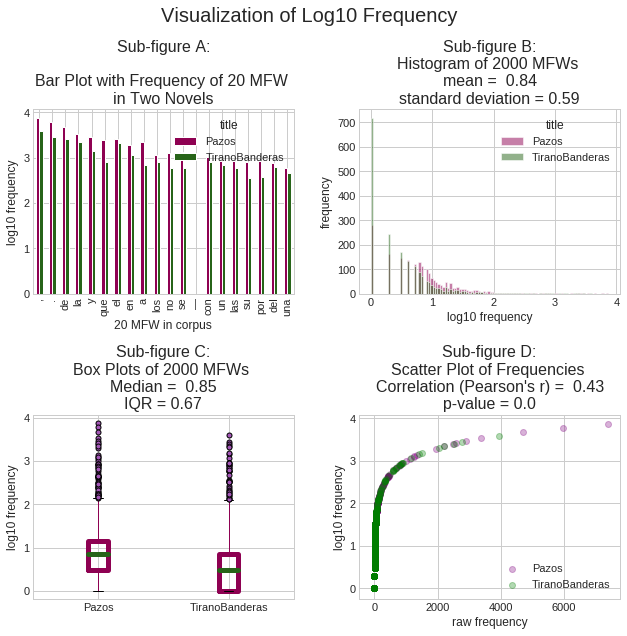

In [41]:
describe_data.visualize_transformation(outdir, corpus_log10, "log10", corpus, "raw", results_sample_df)

In [42]:
corpus_log2 = text2features.choose_features(corpus,"log2")

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:168: RuntimeWarning: divide by zero encountered in log2
  corpus = np.log2(corpus)


textual representation:  log2
Columns that are empty:  []


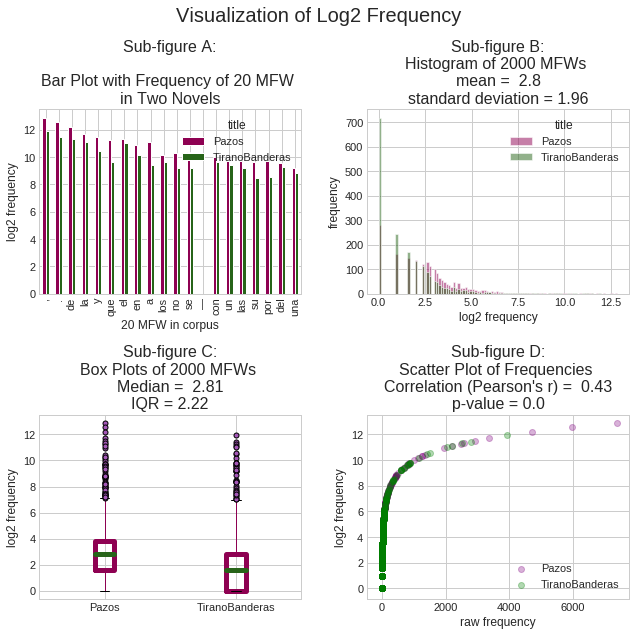

In [43]:
describe_data.visualize_transformation(outdir, corpus_log2, "log2", corpus, "raw", results_sample_df)

In [44]:
corpus_rel_log10 = text2features.choose_features(corpus,"rel-log10")

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:174: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  rel-log10
Columns that are empty:  []


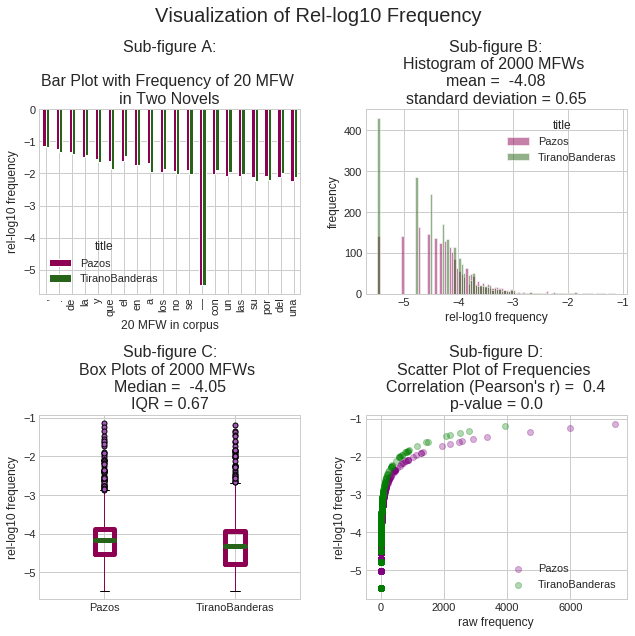

In [45]:
describe_data.visualize_transformation(outdir, corpus_rel_log10, "rel-log10", corpus, "raw", results_sample_df)

In [46]:
corpus_rel_log1000 = text2features.choose_features(corpus,"rel-log1000")

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:179: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)/ np.log(10000)


textual representation:  rel-log1000
Columns that are empty:  []


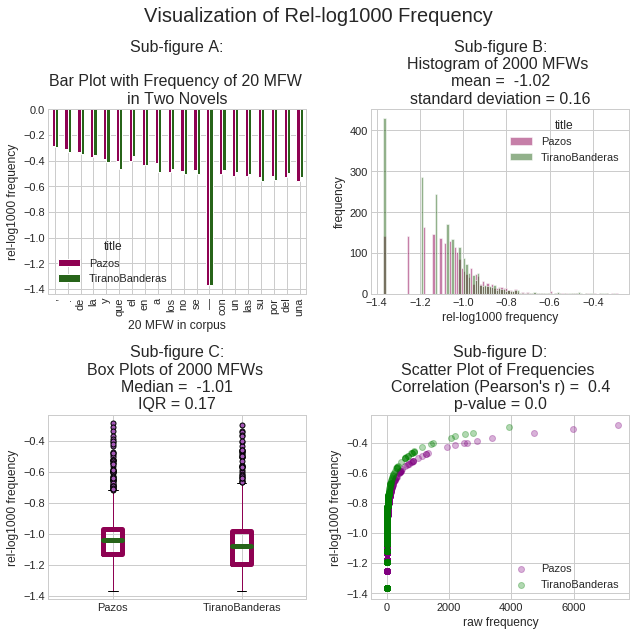

In [47]:
describe_data.visualize_transformation(outdir, corpus_rel_log1000, "rel-log1000", corpus, "raw", results_sample_df)

## 4.2.2.4.  Tf-idf: Term Frequency-Inverse Document Frequency

In [21]:
corpus_tfidf = text2features.choose_features(corpus,"tfidf")

textual representation:  tfidf
Columns that are empty:  []


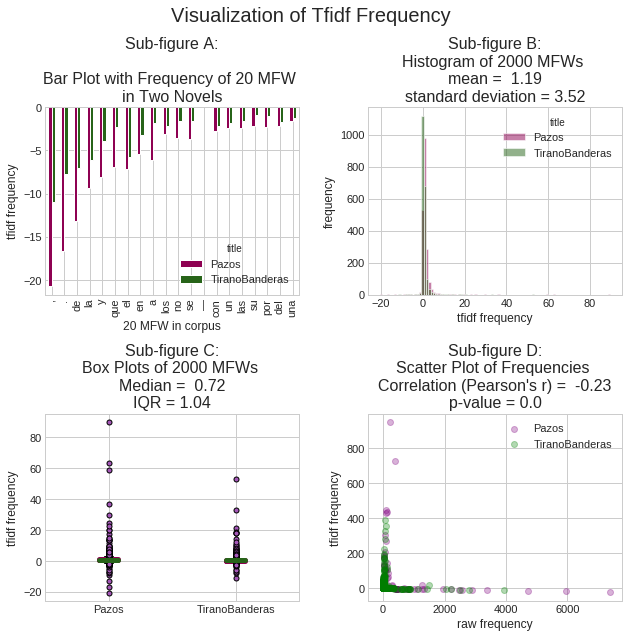

In [22]:
describe_data.visualize_transformation(outdir, corpus_tfidf, "tfidf", corpus, "raw", results_sample_df)

In [23]:
corpus_rel_tfidf = text2features.choose_features(corpus,"rel-tfidf")

textual representation:  rel-tfidf
Columns that are empty:  []


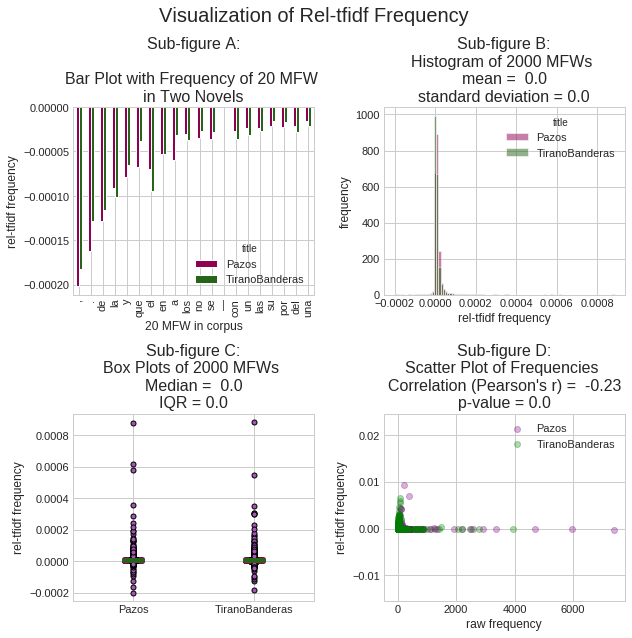

In [24]:
describe_data.visualize_transformation(outdir, corpus_rel_tfidf, "rel-tfidf", corpus, "raw", results_sample_df)

In [25]:
corpus_rel_tfidf.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).head()

title,Pazos
nucha,0.009235
julián,0.007072
perucho,0.004331
sabel,0.004220
pazos,0.004201


In [26]:
st_tests.test_normality(corpus_rel_tfidf.loc["Pazos"])

,statistic,p-value,result
Pazos,1.20195e+06,0,distribution is not normal


In [27]:
st_tests.test_normality(corpus_rel_tfidf.iloc[:,0:2000].loc["Pazos"])

,statistic,p-value,result
Pazos,3803.86,0,distribution is not normal


In [28]:
corpus_rel_log10_tfidf = text2features.choose_features(corpus,"rel-log10-tfidf")

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  rel-log10-tfidf
Columns that are empty:  []


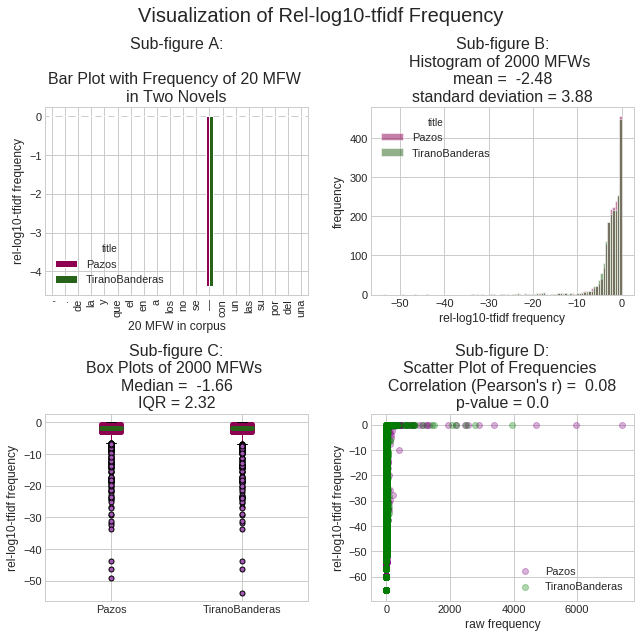

In [29]:
describe_data.visualize_transformation(outdir, corpus_rel_log10_tfidf, "rel-log10-tfidf", corpus, "raw", results_sample_df)

In [30]:
corpus_rel_log10_tfidf.loc[["Pazos"]].T.sort_values(by="Pazos").head()

title,Pazos
habiliá,-65.419459
presagiado,-65.419459
traspilladamente,-65.419459
traspillada,-65.419459
traspie,-65.419459


In [31]:
corpus_rel_log10_tfidf.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).head()

title,Pazos
lejos,0.025499
tarde,0.024454
han,0.024126
nunca,0.023323
ellos,0.022435


In [32]:
corpus_relative.iloc[:,1000:1005].sample(10).head()

,nuevas,blancas,salieron,apareció,dueño
title,,,,,
FrayAntonio,0.000000,0.000285,0.000000,0.000214,0.000071
MadridCorteCheca,0.000041,0.000158,0.000216,0.000000,0.000025
Pazos,0.000029,0.000049,0.000078,0.000049,0.000078
Rebeca,0.000097,0.000222,0.000028,0.000069,0.000097
Finlandesas,0.000083,0.000033,0.000000,0.000000,0.000017


## 4.2.2.5. Binary Frequency

In [33]:
corpus_binary = text2features.choose_features(corpus,"binary")

textual representation:  binary
Columns that are empty:  []


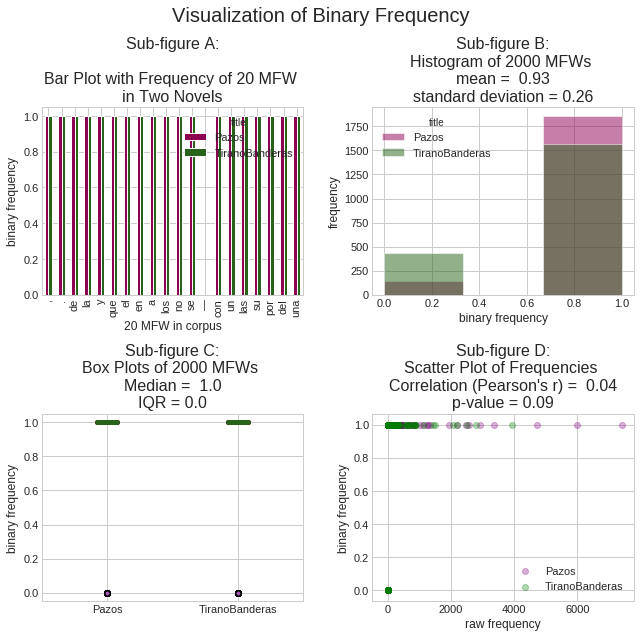

In [34]:
describe_data.visualize_transformation(outdir, corpus_binary, "binary", corpus, "raw",results_sample_df, bins = 3)

## 4.2.2.6. Z-Scores: Standard Term-Document Frequency in Corpus

In [35]:
corpus_zscores = text2features.choose_features(corpus, "zscores")

textual representation:  zscores
Columns that are empty:  []


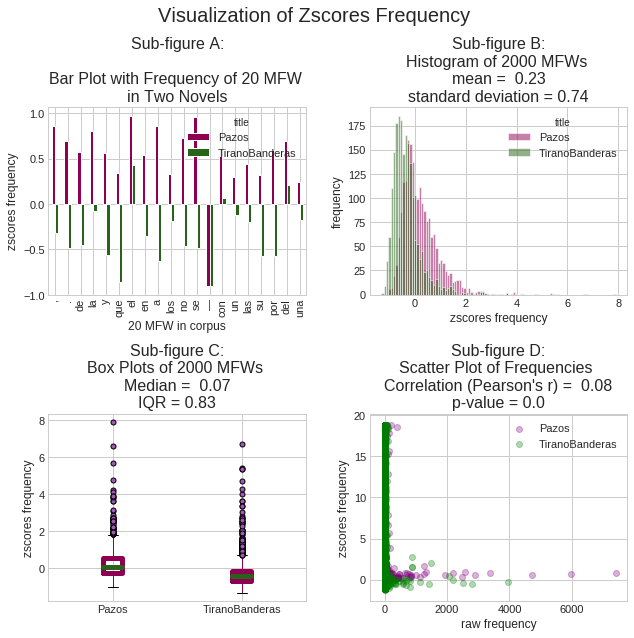

In [36]:
describe_data.visualize_transformation(outdir, corpus_zscores, "zscores", corpus, "raw", results_sample_df)

In [37]:
corpus_zscores.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).head(10)

title,Pazos
zahumadas,18.868036
ahúmes,18.868036
nidaban,18.868036
tenebrosísima,18.868036
leyendarias,18.868036
ningu,18.868036
nego,18.868036
alguacilatos,18.868036
algodonáceas,18.868036
rebatirme,18.868036


In [38]:
Counter(corpus["tenebrosísima"])

Counter({0: 357, 1: 1})

In [39]:
Counter(corpus["tenebrosísima"])

Counter({0: 357, 1: 1})

In [40]:
Counter(corpus["ahúmes"])

Counter({0: 357, 1: 1})

In [41]:
corpus_zscores.loc[["Pazos"]]["nucha"]

title
Pazos    18.850691
Name: nucha, dtype: float64

In [42]:
corpus_rel_zscores = text2features.choose_features(corpus, "rel-zscores")

textual representation:  rel-zscores
Columns that are empty:  []


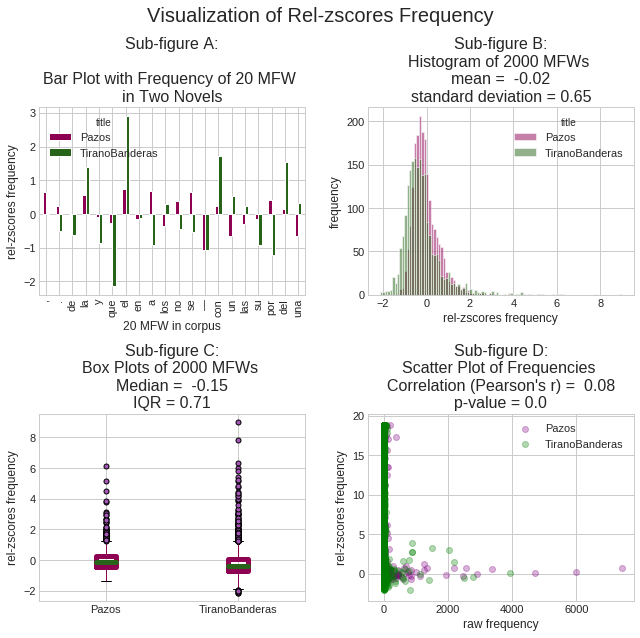

In [43]:
describe_data.visualize_transformation(outdir, corpus_rel_zscores, "rel-zscores", corpus, "raw", results_sample_df)

# 4.2.3. Variants

## 4.2.3.1. Rel-Log10-Zscores

In [21]:
corpus_rel_log10_zscores = text2features.choose_features(corpus,"rel-log10-zscores")


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:174: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  rel-log10-zscores
Columns that are empty:  []


In [22]:
corpus_rel_log10_zscores.head()

,",",.,de,la,y,que,el,en,a,los,...,garantizándoles,garantizándola,garantizáis,garantizasen,garantizará,garantizarlo,garantizarles,garantizara,garantirse,habiliá
title,,,,,,,,,,,,,,,,,,,,,
Mayorazgo,-0.650163,-0.448923,-0.234777,0.612490,0.584791,-0.513953,1.216096,0.327345,0.392511,0.323703,...,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852
Misericordia,1.027258,0.991333,-0.681448,-0.109514,0.365738,0.979659,-1.699191,-0.375869,0.318918,-1.049402,...,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852
Nazarin,1.336306,0.537698,-1.219766,-0.668293,0.801426,1.417553,-0.613788,-0.603767,0.314773,-0.938069,...,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852
Halma,1.360323,0.650474,-0.756681,-0.473477,0.163282,0.885198,-1.159420,-0.439087,0.293490,-1.161496,...,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852
Tristana,0.854145,1.115437,-0.644829,-1.363823,0.171718,0.970480,-1.879879,-1.004514,0.164477,-1.307654,...,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852,-0.052852


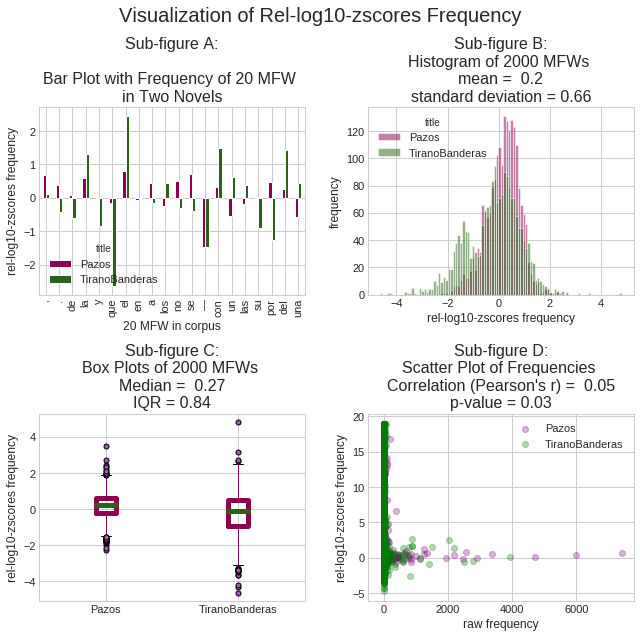

In [23]:
describe_data.visualize_transformation(outdir, corpus_rel_log10_zscores, "rel-log10-zscores", corpus, "raw", results_sample_df)

In [24]:
st_tests.test_normality(corpus_rel_log10_zscores.iloc[:,0:2000].loc["Pazos"])

,statistic,p-value,result
Pazos,53.8176,2.05903e-12,distribution is not normal


In [25]:
st_tests.test_normality(corpus_rel_log10_zscores.loc["Pazos"])

,statistic,p-value,result
Pazos,421107,0,distribution is not normal


In [26]:
corpus_rel_log10_zscores.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).head(10)

title,Pazos
miradaza,18.868036
trasañeja,18.868036
embromados,18.868036
contradijesen,18.868036
contrapesar,18.868036
fulminándole,18.868036
compostelanas,18.868036
comprimiéndolo,18.868036
concilias,18.868036
encausador,18.868036


In [27]:
(corpus[corpus_rel_log10_zscores.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).head(10).index.tolist()] > 0).astype(int).sum()

miradaza          1
trasañeja         1
embromados        1
contradijesen     1
contrapesar       1
fulminándole      1
compostelanas     1
comprimiéndolo    1
concilias         1
encausador        1
dtype: int64

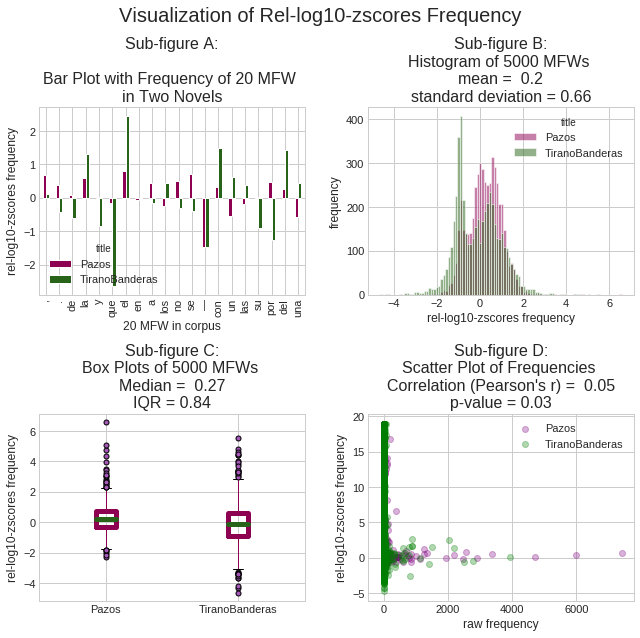

In [28]:
describe_data.visualize_transformation(outdir, corpus_rel_log10_zscores, "rel-log10-zscores", corpus, "raw", results_sample_df, amount_mfws=5000)

## 4.2.3.2. Rel-Tfidf-Zscores

In [29]:
corpus_rel_tfidf_zscores = text2features.choose_features(corpus,"rel-tfidf-zscores")


textual representation:  rel-tfidf-zscores
Columns that are empty:  ['mi', 'él', 'muy', 'ni', 'estaba', 'ojos', 'poco', 'nos', 'he', 'esto', 'así', 'gran', 'tiene', 'les', 'allí', 'cómo', 'menos', 'luego', 'cosas', 'hombres', 'otros', 'hacia', 'puede', 'decir', 'hecho', 'alma', 'luz', 'casi', 'va', 'mientras', 'tierra', 'mañana', 'medio', 'sabe']


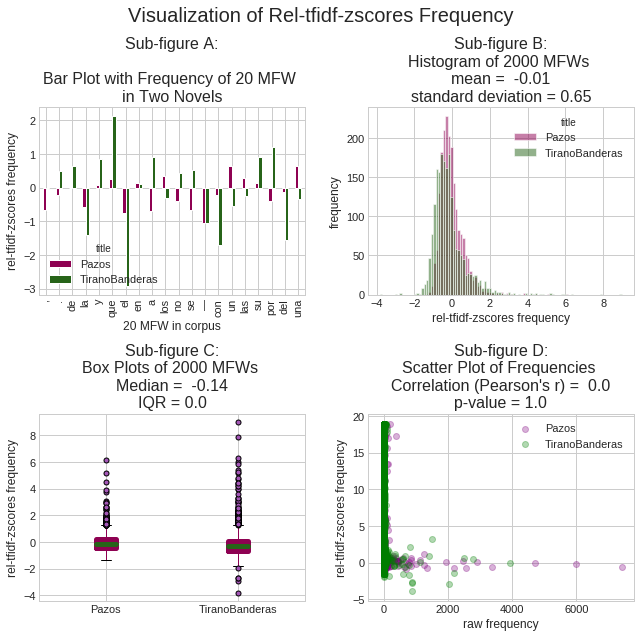

In [30]:
describe_data.visualize_transformation(outdir, corpus_rel_tfidf_zscores, "rel-tfidf-zscores", corpus, "raw", results_sample_df)

In [31]:
corpus_rel_tfidf_zscores.loc[["Pazos"]].T.sort_values(by="Pazos", ascending=False).head(10)

title,Pazos
bababa,18.868036
ferradura,18.868036
despachurrarlas,18.868036
adocenarse,18.868036
ñoor,18.868036
incircunciso,18.868036
pellejones,18.868036
antecedía,18.868036
postcomunio,18.868036
desvencijaba,18.868036


In [32]:
corpus_rel_zscores_tfidf = text2features.choose_features(corpus,"rel-zscores-tfidf")


textual representation:  rel-zscores-tfidf
Columns that are empty:  []


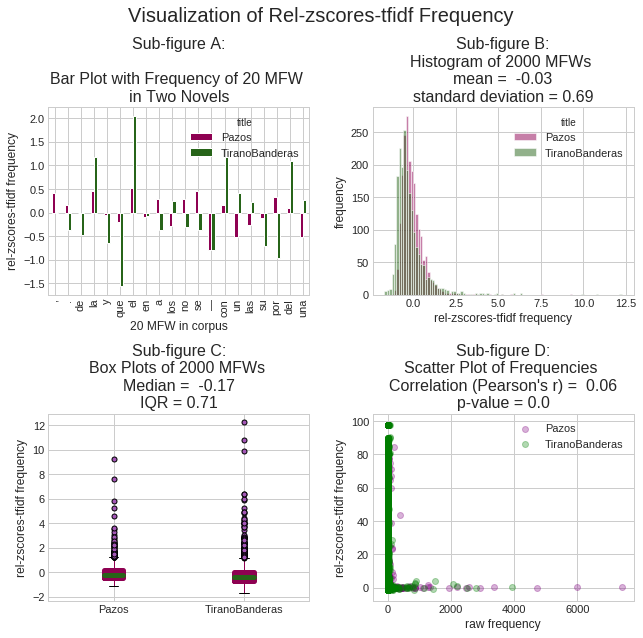

In [33]:
describe_data.visualize_transformation(outdir, corpus_rel_zscores_tfidf, "rel-zscores-tfidf", corpus, "raw", results_sample_df)

## 4.2.3.3. Term Mean Frequency in Chapters

In [34]:
corpus_chapters_df.head()

,",",.,de,la,y,que,el,en,a,los,...,cuaderno,meditaba,dictamen,regaló,maliciosamente,metiéndose,científico,laurel,cáliz,nacidos
ne0001_chap1,96,91,94,77,46,28,50,39,28,20,...,0,0,0,0,0,0,0,0,0,0
ne0001_chap10,85,75,68,53,70,26,34,26,38,23,...,0,0,0,0,0,0,0,0,0,0
ne0001_chap11,117,95,87,47,59,40,60,38,40,47,...,0,0,0,0,0,0,0,0,0,0
ne0001_chap12,143,107,105,94,91,83,65,48,74,31,...,0,0,0,0,0,0,0,0,0,0
ne0001_chap13,93,65,85,39,44,26,39,30,16,21,...,0,0,0,0,0,0,0,0,0,0


In [35]:
corpus_novels_mean_df = text2features.from_chapters_df_make_novels_parameter_df(corpus_chapters_df, parameter = "mean")

amount of novels:  358


In [36]:
corpus_novels_mean_df.head()

,",",.,de,la,y,que,el,en,a,los,...,cuaderno,meditaba,dictamen,regaló,maliciosamente,metiéndose,científico,laurel,cáliz,nacidos
ne0001,0.0606594,0.0501596,0.0473082,0.0361009,0.0343814,0.0230757,0.0298063,0.0219874,0.0212697,0.0145056,...,0,0,0,0,3.68259e-05,0,0,0,0,0
ne0002,0.0856309,0.074666,0.0459443,0.0330724,0.0339005,0.0345089,0.0174929,0.0201618,0.0203265,0.00972406,...,0,0,0,0,0,4.50883e-05,0,2.93194e-05,0,1.18687e-05
ne0003,0.0908376,0.0655976,0.0425684,0.0304557,0.0374591,0.0380804,0.0211833,0.0193281,0.0200648,0.00997292,...,0,0,1.2444e-05,1.27097e-05,0,1.38093e-05,0,0,2.99809e-05,0
ne0004,0.0909995,0.0674677,0.0461108,0.0318902,0.032472,0.0336663,0.0192271,0.0199893,0.0199746,0.00963291,...,0,0,7.13687e-05,1.20155e-05,1.50741e-05,1.12609e-05,0,0,0,0
ne0005,0.0836676,0.0764148,0.0476253,0.0288504,0.0330875,0.0344864,0.0174701,0.0190543,0.0175464,0.00915358,...,0,0,0,0,0,2.0886e-05,0,0,0,0


In [37]:
corpus_novels_mean_df.index = metadata["title"]

In [38]:
corpus_novels_mean_df["—"]["Pazos"]

0.0

In [39]:
results_mean_df = text2features.describe_transformation(corpus_novels_mean_df, ["relative-mean"], make_relative=False, use_other_corpus_to_compare=True, comparing_corpus=corpus)#,"","log10","minmax","log10zscores","zscoreslog"])

(358, 2000)
relative-mean
textual representation:  relative-mean
Columns that are empty:  []
                      ,          .         de         la          y  \
title                                                                 
Mayorazgo     0.0606594  0.0501596  0.0473082  0.0361009  0.0343814   
Misericordia  0.0856309   0.074666  0.0459443  0.0330724  0.0339005   
Nazarin       0.0908376  0.0655976  0.0425684  0.0304557  0.0374591   
Halma         0.0909995  0.0674677  0.0461108  0.0318902   0.032472   
Tristana      0.0836676  0.0764148  0.0476253  0.0288504  0.0330875   

                    que         el         en          a         los  \
title                                                                  
Mayorazgo     0.0230757  0.0298063  0.0219874  0.0212697   0.0145056   
Misericordia  0.0345089  0.0174929  0.0201618  0.0203265  0.00972406   
Nazarin       0.0380804  0.0211833  0.0193281  0.0200648  0.00997292   
Halma         0.0336663  0.0192271  0.0199893  0.

In [40]:
results_mean_df

,min,max,mean,std,median,IQR,Pearson's R,R p-value,Gaussian Test,Gaussian p-value,skew
transformation,,,,,,,,,,,
relative-mean,0.0,0.08249,0.000431,0.003191,0.000074,0.000124,0.993559,0.0,4163.634668,0.0,17.341524


In [41]:
corpus_novels_mean_df.loc["Pazos"]["—"]

0.0

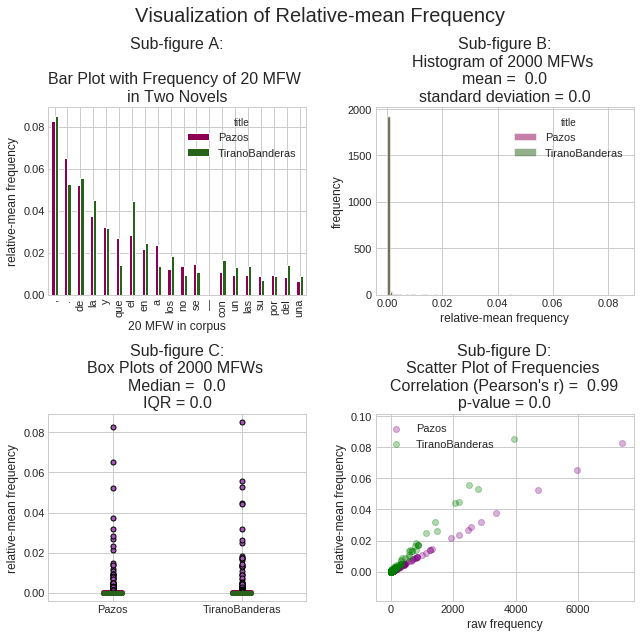

In [42]:
describe_data.visualize_transformation(outdir, corpus_novels_mean_df, "relative-mean", corpus, "raw", results_mean_df)

Variant with median

In [43]:
corpus_novels_median_df = text2features.from_chapters_df_make_novels_parameter_df(corpus_chapters_df, parameter = "median")

amount of novels:  358


In [44]:
corpus_novels_median_df.index = metadata["title"]

In [45]:
results_median_df = text2features.describe_transformation(corpus_novels_median_df, ["relative-median"], make_relative=False, use_other_corpus_to_compare=True, comparing_corpus=corpus)

(358, 2000)
relative-median
textual representation:  relative-median
Columns that are empty:  []
                      ,          .         de         la          y  \
title                                                                 
Mayorazgo     0.0585009  0.0495868  0.0438293  0.0347263   0.035004   
Misericordia  0.0853941  0.0743551  0.0463576  0.0334347  0.0331565   
Nazarin       0.0898577  0.0609641  0.0427892  0.0309001  0.0367347   
Halma         0.0892683  0.0719344  0.0428629  0.0307832  0.0320285   
Tristana      0.0818182  0.0745898  0.0450216  0.0262152  0.0319032   

                    que         el         en          a         los  ...    \
title                                                                 ...     
Mayorazgo     0.0217391  0.0283114  0.0215054  0.0213231   0.0132128  ...     
Misericordia  0.0352807  0.0173299  0.0201918  0.0207254  0.00976631  ...     
Nazarin       0.0379054  0.0212663  0.0196335  0.0199297   0.0091623  ...     
Halma     

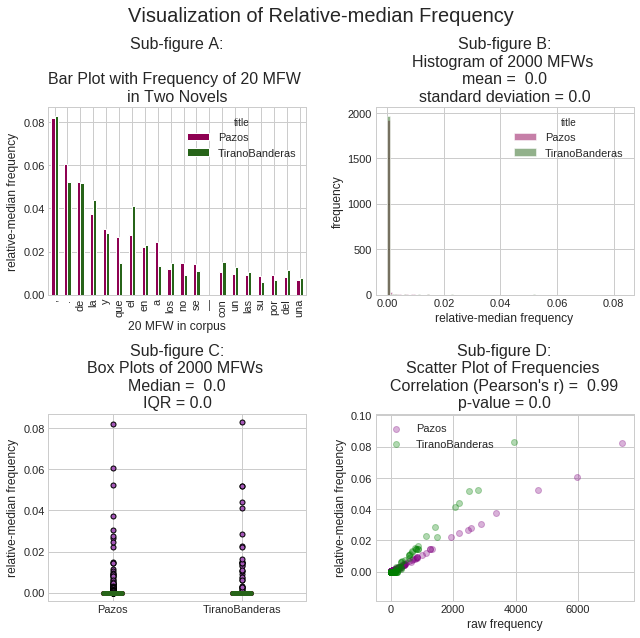

In [46]:
describe_data.visualize_transformation(outdir, corpus_novels_median_df, "relative-median", corpus, "raw", results_median_df)

## 4.2.3.4. Term Standard Deviation Frequency in Chapters

In [47]:
corpus_novels_std_df = text2features.from_chapters_df_make_novels_parameter_df(corpus_chapters_df, parameter = "std")

amount of novels:  358


In [48]:
corpus_novels_std_df.index = metadata["title"]

In [49]:
corpus_novels_std_df.loc["Pazos"]["—"]

0.0

In [50]:
results_std_df = text2features.describe_transformation(corpus_novels_std_df, ["relative-std"], make_relative=False, use_other_corpus_to_compare=True, comparing_corpus=corpus)#,"","log10","minmax","log10zscores","zscoreslog"])

(358, 2000)
relative-std
textual representation:  relative-std
Columns that are empty:  [',', '.', 'de', 'la', 'y', 'que', 'el', 'en', 'a', 'los', 'no', 'se', '—', 'con', 'un', 'las', 'su', 'por', 'del', 'una', ';', 'al', 'lo', 'le', '!', '¡', 'como', 'para', '?', '¿', '-', 'me', 'es', 'más', ':', 'sus', 'pero', 'era', 'si', 'había', 'yo', 'qué', 'á', 'sin', 'mi', 'usted', 'ya', '»', 'todo', 'él', '«', 'cuando', 'o', 'ella', 'ha', 'muy', 'tan', 'ni', 'sobre', 'te', 'dos', 'porque', '…', 'casa', 'todos', 'don', 'dijo', 'hasta', 'entre', 'esta', 'hombre', 'este', 'bien', 'ser', 'estaba', 'sí', 'después', 'pues', 'vida', 'aquel', 'tenía', 'ojos', 'vez', 'mismo', 'nada', 'poco', 'hay', 'otro', 'aquella', 'mujer', 'nos', 'siempre', 'he', 'esto', 'también', 'así', 'día', 'eso', 'señor', 'está', 'otra', 'tiempo', 'aquí', 'donde', 'ahora', 'desde', 'fue', 'mí', 'gran', 'noche', 'todas', 'tú', 'ver', 'mucho', 'tiene', 'les', 'padre', 'sólo', 'allí', 'algo', 'son', 'uno', 'toda', 'dios', 'antes'

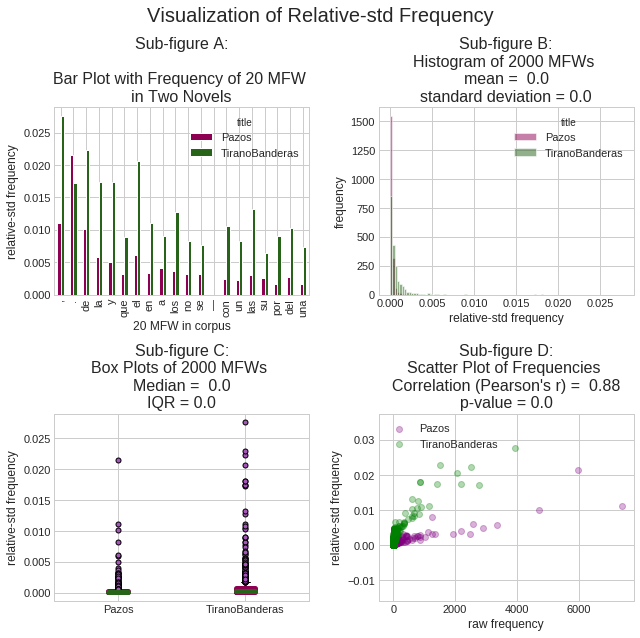

In [51]:
describe_data.visualize_transformation(outdir, corpus_novels_std_df, "relative-std", corpus, "raw", results_std_df)

## 4.2.3.5. Language-Zscores

In [52]:
corpus_rel_lang_zscore = text2features.choose_features(corpus, "rel-lang-zscore")

textual representation:  rel-lang-zscore
Columns that are empty:  ['huellas', 'pereza', 'asu', 'nj']


In [53]:
results_sample_df

,min,max,mean,std,median,IQR,Pearson's R,R p-value,Gaussian Test,Gaussian p-value,skew
transformation,,,,,,,,,,,
raw,0.000000,7403.000000,39.212500,288.910491,7.000000,11.000000,1.000000,0.000000e+00,4151.122770,0.000000e+00,17.230192
relative,0.000000,0.094396,0.000500,0.003684,0.000089,0.000140,1.000000,0.000000e+00,4151.122770,0.000000e+00,17.230192
zscores,-1.006320,7.894330,0.228450,0.743293,0.070963,0.829397,0.077459,5.260734e-04,1105.869091,7.304289e-241,2.313855
rel-zscores,-1.334026,6.404743,-0.016593,0.652386,-0.147358,0.705040,0.076669,5.999638e-04,1021.858282,1.277302e-222,2.141755
tfidf,-20.649944,89.760331,1.185041,3.518208,0.715812,1.041117,-0.227305,7.493016e-25,3803.857227,0.000000e+00,14.146985
log,0.000000,8.909641,1.943745,1.359370,1.945910,1.540445,0.430580,4.473665e-91,331.820295,8.833615e-73,0.956717
rel-log,-12.390800,-2.360257,-9.405176,1.495867,-9.323988,1.540445,0.398463,4.348977e-77,134.665804,5.723903e-30,0.424749
log-zscores,-1.857956,3.698068,0.430599,0.756018,0.510102,1.007981,0.064611,3.843876e-03,2.927110,2.314122e-01,-0.051868
rel-log-zscores,-2.265015,3.517787,0.197613,0.663549,0.273599,0.842330,0.049401,2.715714e-02,61.214025,5.099685e-14,-0.323647


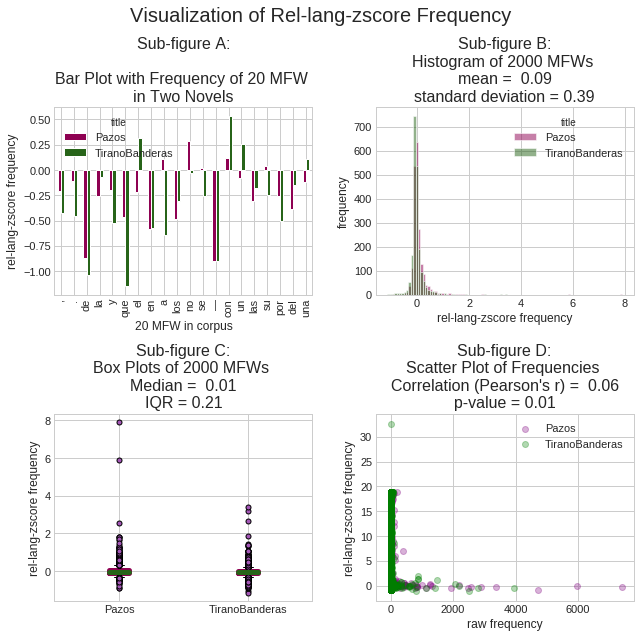

In [54]:
describe_data.visualize_transformation(outdir, corpus_rel_lang_zscore, "rel-lang-zscore", corpus, "raw", results_sample_df)

## 4.2.3.6. Authorial-Zscores

In [21]:
novels_authorial_zscores_df = text2features.from_chapters_df_make_author_zscores_df(corpus_chapters_df, metadata)

amount of novels:  358
                ,          .         de         la          y        que  \
ne0001  0.0606594  0.0501596  0.0473082  0.0361009  0.0343814  0.0230757   
ne0002  0.0856309   0.074666  0.0459443  0.0330724  0.0339005  0.0345089   

               el         en          a         los     ...      cuaderno  \
ne0001  0.0298063  0.0219874  0.0212697   0.0145056     ...             0   
ne0002  0.0174929  0.0201618  0.0203265  0.00972406     ...             0   

       meditaba dictamen regaló maliciosamente   metiéndose científico  \
ne0001        0        0      0    3.68259e-05            0          0   
ne0002        0        0      0              0  4.50883e-05          0   

             laurel cáliz      nacidos  
ne0001            0     0            0  
ne0002  2.93194e-05     0  1.18687e-05  

[2 rows x 10000 columns]
Bayo 28 1
Salaverria 28 1
Carrere 35 2
Rueda 82 4
Miro 325 19
Serrano 9 1
RBaroja 57 2
Valera 134 3
Azana 20 2
Aparicio 20 1
Hoyos 9 1
Zamacois 

In [22]:
novels_authorial_zscores_df.head()

,",",.,de,la,y,que,el,en,a,los,...,cuaderno,meditaba,dictamen,regaló,maliciosamente,metiéndose,científico,laurel,cáliz,nacidos
ne0001,-0.517583,-0.197769,-0.114103,0.390472,-0.0894276,-0.180803,0.541677,0.0328616,-0.386542,0.128569,...,-0.0572812,-0.0187496,-0.0317571,-0.0836904,0.445289,-0.0449018,-0.066202,-0.0471779,-0.0369437,-0.063263
ne0002,0.888811,-0.027243,-0.00586899,0.220249,0.349288,0.112508,-0.289123,0.139223,0.0942322,-0.0551082,...,-0.0457161,-0.0668858,-0.131362,-0.0880645,-0.0228232,0.380479,-0.04525,0.503642,-0.0738845,0.0159514
ne0003,1.3011,-0.243623,-0.262818,-0.095991,0.809474,0.62154,0.338821,-0.0118549,0.0538853,-0.00216487,...,-0.0457161,-0.0668858,-0.0143375,0.133334,-0.0228232,0.0142575,-0.04525,-0.0684516,0.184449,-0.112869
ne0004,1.31392,-0.198999,0.00680078,0.077371,0.16455,-0.00758813,0.00596682,0.107967,0.0399744,-0.0745009,...,-0.0457161,-0.0668858,0.539793,0.121241,0.520272,-0.0155799,-0.04525,-0.0684516,-0.0738845,-0.112869
ne0005,0.733344,0.0144848,0.12207,-0.29,0.244149,0.1093,-0.29299,-0.0614662,-0.334464,-0.176476,...,-0.0457161,-0.0668858,-0.131362,-0.0880645,-0.0228232,0.0971128,-0.04525,-0.0684516,-0.0738845,-0.112869


In [23]:
novels_authorial_zscores_df.index = metadata["title"]

In [24]:
results_authorial_zscore_df = text2features.describe_transformation(novels_authorial_zscores_df, ["authorial-zscore"], make_relative=False, use_other_corpus_to_compare=True, comparing_corpus=corpus)#,"","log10","minmax","log10zscores","zscoreslog"])

(358, 2000)
authorial-zscore
textual representation:  authorial-zscore
Columns that are empty:  []
                     ,          .          de        la          y  \
title                                                                
Mayorazgo    -0.517583  -0.197769   -0.114103  0.390472 -0.0894276   
Misericordia  0.888811  -0.027243 -0.00586899  0.220249   0.349288   
Nazarin         1.3011  -0.243623   -0.262818 -0.095991   0.809474   
Halma          1.31392  -0.198999  0.00680078  0.077371    0.16455   
Tristana      0.733344  0.0144848     0.12207     -0.29   0.244149   

                     que          el         en          a         los  \
title                                                                    
Mayorazgo      -0.180803    0.541677  0.0328616  -0.386542    0.128569   
Misericordia    0.112508   -0.289123   0.139223  0.0942322  -0.0551082   
Nazarin          0.62154    0.338821 -0.0118549  0.0538853 -0.00216487   
Halma        -0.00758813  0.00596682   0

In [25]:
results_authorial_zscore_df

,min,max,mean,std,median,IQR,Pearson's R,R p-value,Gaussian Test,Gaussian p-value,skew
transformation,,,,,,,,,,,
authorial-zscore,-0.647895,1.852354,0.005232,0.228236,-0.033878,0.261508,0.03718,0.096454,675.148304,2.474050e-147,1.497129


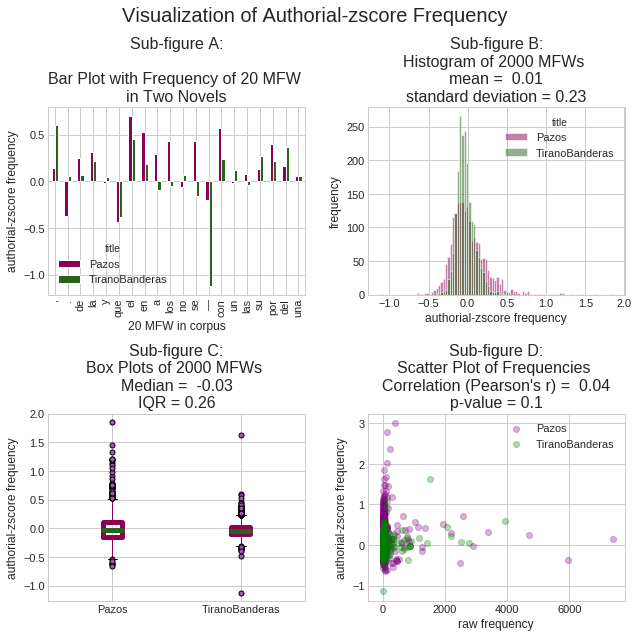

In [26]:
describe_data.visualize_transformation(outdir, novels_authorial_zscores_df, "authorial-zscore", corpus, "raw", results_authorial_zscore_df)

In [27]:
novels_authorial_zscores_df.loc["Pazos"].sort_values().iloc[np.r_[0:10, -10:0]]

este        -0.647895
yo          -0.626856
mi          -0.625815
esta        -0.599319
mis         -0.568662
me          -0.542667
mí          -0.528283
ella        -0.512501
ese         -0.498659
dentro      -0.475886
marqués       1.44865
eugenio       1.46807
cazador       1.47788
escopeta      1.63017
ulloa         1.67605
éste          1.85235
primitivo     2.01538
nucha         2.36481
capellán       2.7843
julián        3.01616
Name: Pazos, dtype: object

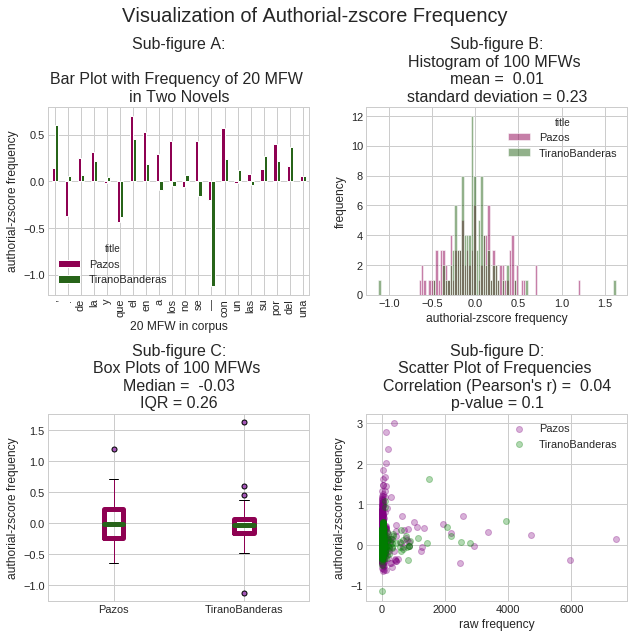

In [28]:
describe_data.visualize_transformation(outdir, novels_authorial_zscores_df, "authorial-zscore", corpus, "raw", results_authorial_zscore_df, amount_mfws=100)

In [29]:
st_tests.test_normality(novels_authorial_zscores_df.iloc[:,0:2000].loc["Pazos"])

,statistic,p-value,result
Pazos,675.148,2.47405e-147,distribution is not normal


In [30]:
st_tests.test_normality(novels_authorial_zscores_df.iloc[:,0:1000].loc["Pazos"])

,statistic,p-value,result
Pazos,342.898,3.47307e-75,distribution is not normal


In [31]:
st_tests.test_normality(novels_authorial_zscores_df.iloc[:,0:100].loc["Pazos"])

,statistic,p-value,result
Pazos,4.05428,0.131711,distribution is normal


In [32]:
st_tests.test_normality(novels_authorial_zscores_df.loc["Pazos"])

,statistic,p-value,result
Pazos,6381.05,0,distribution is not normal


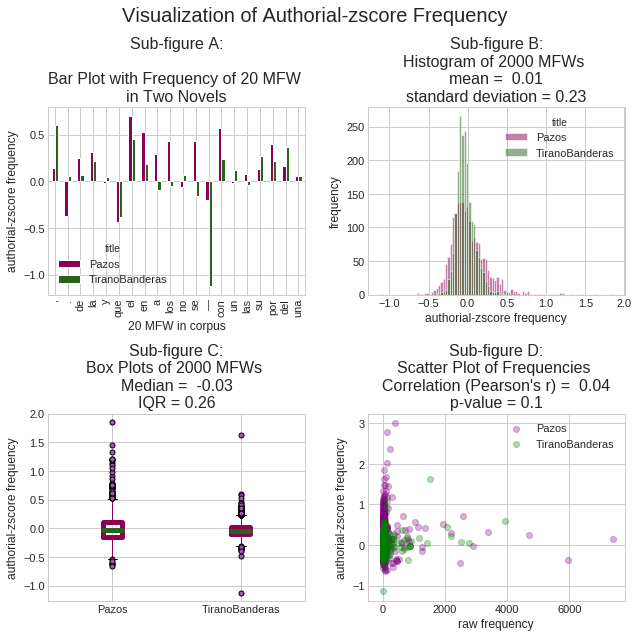

In [33]:
describe_data.visualize_transformation(outdir, novels_authorial_zscores_df, "authorial-zscore", corpus, "raw", results_authorial_zscore_df)

In [34]:
corpus_chapters_rel_log10_df = text2features.choose_features(corpus_chapters_df, "rel-log10")

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:174: RuntimeWarning: divide by zero encountered in log10
  corpus = np.log10(corpus)


textual representation:  rel-log10
Columns that are empty:  []


In [35]:
corpus_chapters_rel_log10_df.head()

,",",.,de,la,y,que,el,en,a,los,...,cuaderno,meditaba,dictamen,regaló,maliciosamente,metiéndose,científico,laurel,cáliz,nacidos
ne0001_chap1,-1.232837,-1.256067,-1.241981,-1.328618,-1.552351,-1.767951,-1.516139,-1.624044,-1.767951,-1.914079,...,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424
ne0001_chap10,-1.252425,-1.306782,-1.349335,-1.457568,-1.336746,-1.766870,-1.650365,-1.766870,-1.602060,-1.820116,...,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424
ne0001_chap11,-1.203423,-1.293886,-1.332090,-1.599511,-1.500757,-1.669549,-1.493458,-1.691826,-1.669549,-1.599511,...,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424
ne0001_chap12,-1.243818,-1.369771,-1.377965,-1.426026,-1.440113,-1.480076,-1.586241,-1.717913,-1.529923,-1.907793,...,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424
ne0001_chap13,-1.130852,-1.286422,-1.169916,-1.508271,-1.455883,-1.684362,-1.508271,-1.622214,-1.895215,-1.777116,...,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424,-4.562424


In [36]:
novels_authorial_rel_log_df = text2features.from_chapters_df_make_author_zscores_df(corpus_chapters_rel_log10_df, metadata)

amount of novels:  358
                  ,            .           de           la            y  \
ne0001  2.72779e-05  2.91668e-05  2.98643e-05  3.24076e-05  3.28601e-05   
ne0002  2.39099e-05  2.58266e-05  3.01043e-05  3.33196e-05  3.30217e-05   

                que           el           en            a          los  \
ne0001  3.69328e-05  3.42869e-05  3.72374e-05   3.7533e-05  4.17584e-05   
ne0002  3.27693e-05  3.95345e-05  3.81487e-05  3.80796e-05   4.5642e-05   

           ...          cuaderno     meditaba     dictamen       regaló  \
ne0001     ...       0.000101782  0.000101782  0.000101782  0.000101782   
ne0002     ...       0.000102015  0.000102015  0.000102015  0.000102015   

       maliciosamente   metiéndose   científico       laurel        cáliz  \
ne0001    9.98975e-05  0.000101782  0.000101782  0.000101782  0.000101782   
ne0002    0.000102015  9.93485e-05  0.000102015   0.00010011  0.000102015   

            nacidos  
ne0001  0.000101782  
ne0002  0.000101333  



In [37]:
novels_authorial_rel_log_df.index = metadata["title"]

In [38]:
novels_authorial_rel_log_df.head()

,",",.,de,la,y,que,el,en,a,los,...,cuaderno,meditaba,dictamen,regaló,maliciosamente,metiéndose,científico,laurel,cáliz,nacidos
title,,,,,,,,,,,,,,,,,,,,,
Mayorazgo,0.0953496,0.0404363,0.0139277,-0.0995661,0.0174527,0.00732594,-0.151747,-0.0292554,0.053976,-0.107943,...,0.0590745,0.0344291,0.0361382,0.0566646,-0.0960646,0.0392639,0.0636127,0.0392216,0.037186,0.0432348
Misericordia,-0.122435,-0.0367085,-0.0193354,-0.0523113,-0.0748672,-0.0304356,0.0476608,-0.0423388,-0.0994655,-0.052469,...,0.020811,0.0270761,0.0593756,0.0352487,0.0155679,-0.12157,0.0206112,-0.125372,0.0381162,-0.000554838
Nazarin,-0.173245,0.0335724,0.0370822,0.00289542,-0.153458,-0.103843,-0.0964213,-0.0142153,-0.0972755,-0.0780658,...,0.010919,0.0176226,-0.00159988,-0.0338538,0.00508636,-0.000224255,0.0106543,0.0188326,-0.0925081,0.0400207
Halma,-0.173085,0.0111429,-0.0167466,-0.020583,-0.049409,-0.0120311,-0.0226298,-0.0410841,-0.0961868,-0.0353758,...,0.0150381,0.021559,-0.162366,-0.0248958,-0.059127,0.0103607,0.0148004,0.0227448,0.0330197,0.0435062
Tristana,-0.103541,-0.0448789,-0.0372249,0.0529416,-0.0624185,-0.0280406,0.052948,0.0101685,-0.0255649,-0.0103254,...,0.0128704,0.0194874,0.0529205,0.0279883,0.00715404,-0.0152016,0.0126185,0.020686,0.031106,0.0416719


In [39]:
results_rel_log_authorial_zscore_df = text2features.describe_transformation(novels_authorial_rel_log_df, ["authorial-zscore-rel-log"], make_relative=False, use_other_corpus_to_compare=True, comparing_corpus=corpus)

(358, 2000)
authorial-zscore-rel-log
textual representation:  authorial-zscore-rel-log
Columns that are empty:  []
                      ,          .         de          la          y  \
title                                                                  
Mayorazgo     0.0953496  0.0404363  0.0139277  -0.0995661  0.0174527   
Misericordia  -0.122435 -0.0367085 -0.0193354  -0.0523113 -0.0748672   
Nazarin       -0.173245  0.0335724  0.0370822  0.00289542  -0.153458   
Halma         -0.173085  0.0111429 -0.0167466   -0.020583  -0.049409   
Tristana      -0.103541 -0.0448789 -0.0372249   0.0529416 -0.0624185   

                     que         el         en          a        los  \
title                                                                  
Mayorazgo     0.00732594  -0.151747 -0.0292554   0.053976  -0.107943   
Misericordia  -0.0304356  0.0476608 -0.0423388 -0.0994655  -0.052469   
Nazarin        -0.103843 -0.0964213 -0.0142153 -0.0972755 -0.0780658   
Halma         -0.012

In [40]:
results_rel_log_authorial_zscore_df

,min,max,mean,std,median,IQR,Pearson's R,R p-value,Gaussian Test,Gaussian p-value,skew
transformation,,,,,,,,,,,
authorial-zscore-rel-log,-0.911296,0.527651,-0.011194,0.13063,0.001558,0.155273,-0.013566,0.544281,441.778643,1.172159e-96,-0.976434


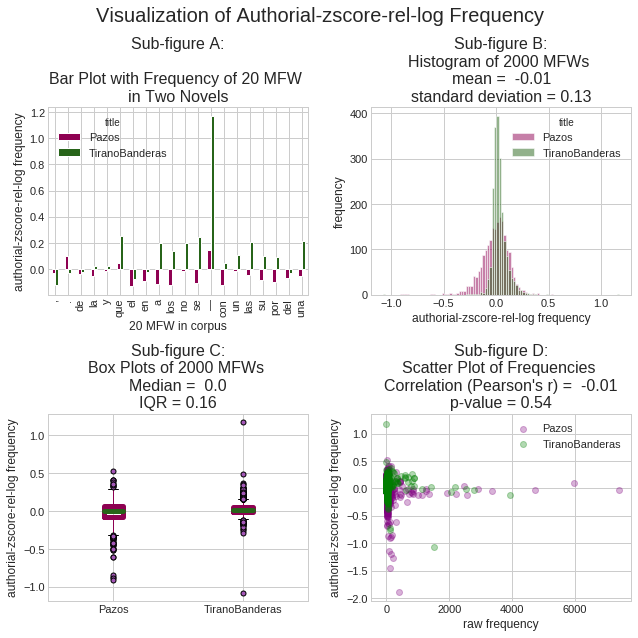

In [41]:
describe_data.visualize_transformation(outdir, novels_authorial_rel_log_df, "authorial-zscore-rel-log", corpus, "raw", results_rel_log_authorial_zscore_df)

In [42]:
st_tests.test_normality(novels_authorial_rel_log_df.loc["Pazos"])

,statistic,p-value,result
Pazos,8192.27,0,distribution is not normal


In [43]:
novels_authorial_rel_log_df.loc["Pazos"].sort_values().iloc[np.r_[0:10, -10:0]]

julián       -1.89186
capellán      -1.4486
nucha        -1.27691
primitivo    -1.19457
ulloa        -1.14119
señorito    -0.911296
marqués     -0.887599
éste        -0.869305
pedro       -0.843284
escopeta    -0.681024
esta          0.33058
mí           0.335246
dentro       0.340077
nuestra      0.352203
ese          0.360979
nos          0.378257
este         0.404704
mi            0.40571
yo           0.406319
mis          0.527651
Name: Pazos, dtype: object